# Support Vector Machine - Engineering Graduate Salary Prediction
*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0/
*   e-mail - sanjay.s.rao04@gmail.com

## Import packages

In [18]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

## The Dataset

Engineering is the use of scientific principles to design and build machines, structures, and other items, including bridges, tunnels, roads, vehicles, and buildings. The discipline of engineering encompasses a broad range of more specialized fields of engineering, each with a more specific emphasis on particular areas of applied mathematics, applied science, and types of application.

### Objective

A relevant question is what determines the salary and the jobs these engineers are offered right after graduation. Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs, the specialization one have, market conditions for specific industries determine this. On the basis of these various factors, your objective is to determine the salary of an engineering graduate in India.

### Data Description
- __ID:__ A unique ID to identify a candidate
- __Salary:__ Annual CTC offered to the candidate (in INR)
- __Gender:__ Candidate's gender
- __DOB:__ Date of birth of the candidate
- __10percentage:__ Overall marks obtained in grade 10 examinations
- __10board:__ The school board whose curriculum the candidate followed in grade 10
- __12graduation:__ Year of graduation - senior year high school
- __12percentage:__ Overall marks obtained in grade 12 examinations
- __12board:__ The school board whose curriculum the candidate followed
- __CollegeID:__ Unique ID identifying the university/college which the candidate attended for her/his undergraduate
- __CollegeTier:__ Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
- __Degree:__ Degree obtained/pursued by the candidate
- __Specialization:__ Specialization pursued by the candidate
- __CollegeGPA:__ Aggregate GPA at graduation
- __CollegeCityID:__ A unique ID to identify the city in which the college is located in.
- __CollegeCityTier:__ The tier of the city in which the college is located in. This is annotated based on the population of the cities.
- __CollegeState:__ Name of the state in which the college is located
- __GraduationYear:__ Year of graduation (Bachelor's degree)
- __English:__ Scores in AMCAT English section
- __Logical:__ Score in AMCAT Logical ability section
- __Quant:__ Score in AMCAT's Quantitative ability section
- __Domain:__ Scores in AMCAT's domain module
- __ComputerProgramming:__ Score in AMCAT's Computer programming section
- __ElectronicsAndSemicon:__ Score in AMCAT's Electronics & Semiconductor Engineering section
- __ComputerScience:__ Score in AMCAT's Computer Science section
- __MechanicalEngg:__ Score in AMCAT's Mechanical Engineering section
- __ElectricalEngg:__ Score in AMCAT's Electrical Engineering section
- __TelecomEngg:__ Score in AMCAT's Telecommunication Engineering section
- __CivilEngg:__ Score in AMCAT's Civil Engineering section
- __conscientiousness:__ Scores in one of the sections of AMCAT's personality test
- __agreeableness:__ Scores in one of the sections of AMCAT's personality test
- __extraversion:__ Scores in one of the sections of AMCAT's personality test
- __nueroticism:__ Scores in one of the sections of AMCAT's personality test
- __openesstoexperience:__ Scores in one of the sections of AMCAT's personality test

The dataset can be found [here](https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction)

## Read the Dataset

In [19]:
df = pd.read_csv('./Datasets/Engineering_graduate_salary.csv')
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
# shape of the dataframe
df.shape

(2998, 34)

There is a total of 34 features and records of 2998 graduates.

In [4]:
# check for missing value
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(df)

,Total,Percent
ID,0,0.0
ElectricalEngg,0,0.0
Quant,0,0.0
Domain,0,0.0
ComputerProgramming,0,0.0
ElectronicsAndSemicon,0,0.0
ComputerScience,0,0.0
MechanicalEngg,0,0.0
TelecomEngg,0,0.0
Gender,0,0.0


There is no missing values present in the dataset. 

In [5]:
round(df['Salary'].describe())

count       2998.0
mean      305175.0
std       212331.0
min        35000.0
25%       180000.0
50%       300000.0
75%       370000.0
max      4000000.0
Name: Salary, dtype: float64

The above statistics infer that, the __maximum__ salary is __Rs.40,00,000/-__ and the __minimum__ salary is __Rs.35,000/-.__ 

On an average, an Engineering graduate receives a salary of __Rs.3,05,175/-__

In [6]:
# check for duplicated rows
df.duplicated().sum()

0

## Exploratory Data Analysis

<AxesSubplot:xlabel='Salary', ylabel='Count'>

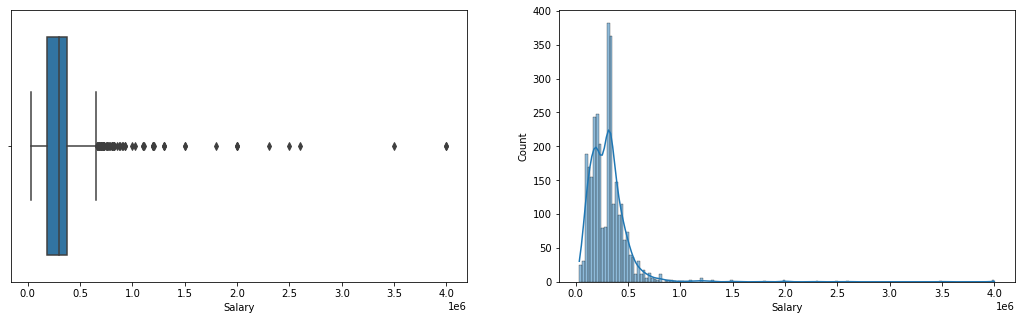

In [7]:
# visualizing the target column
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'Salary', data = df)
plt.subplot(1,2,2)
sns.histplot(x = 'Salary', data = df, kde = True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

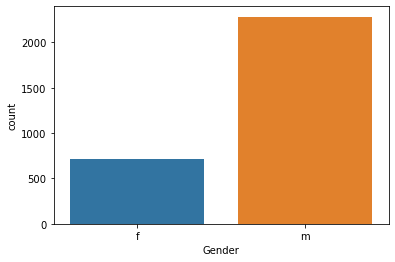

In [8]:
sns.countplot(x = 'Gender', data = df)

<AxesSubplot:ylabel='Degree'>

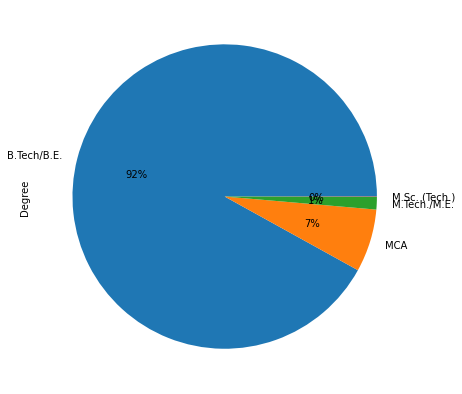

In [9]:
plt.figure(figsize = (7,7))
df['Degree'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

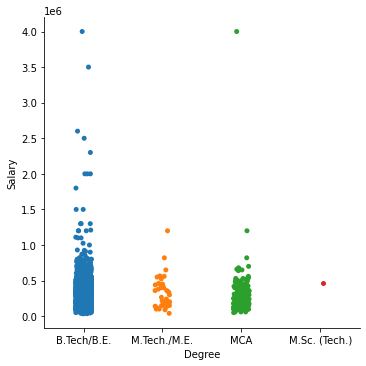

In [10]:
sns.catplot(x = 'Degree', y ='Salary', data = df)

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

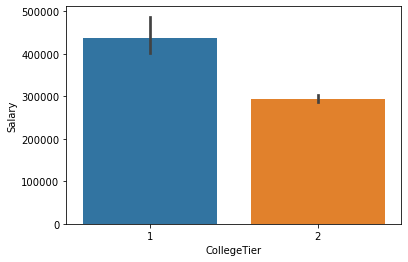

In [11]:
sns.barplot(x = 'CollegeTier', y ='Salary', data = df)

<AxesSubplot:xlabel='12graduation', ylabel='Salary'>

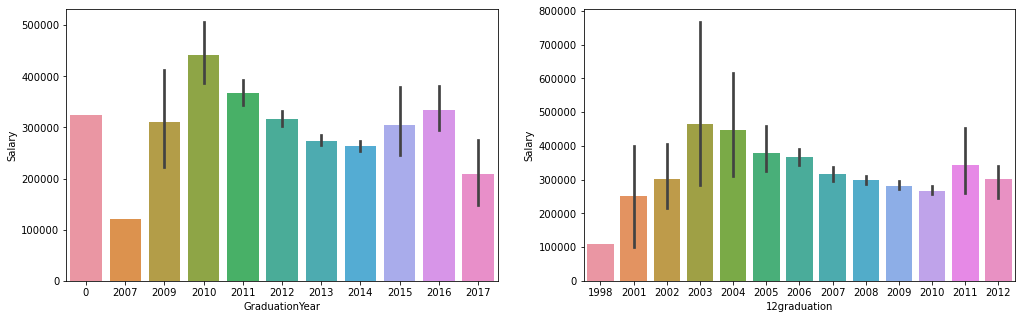

In [12]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
sns.barplot(data = df , x = 'GraduationYear',y = 'Salary')
plt.subplot(1,2,2)
sns.barplot(data = df , x = '12graduation',y = 'Salary')

<AxesSubplot:xlabel='count', ylabel='Specialization'>

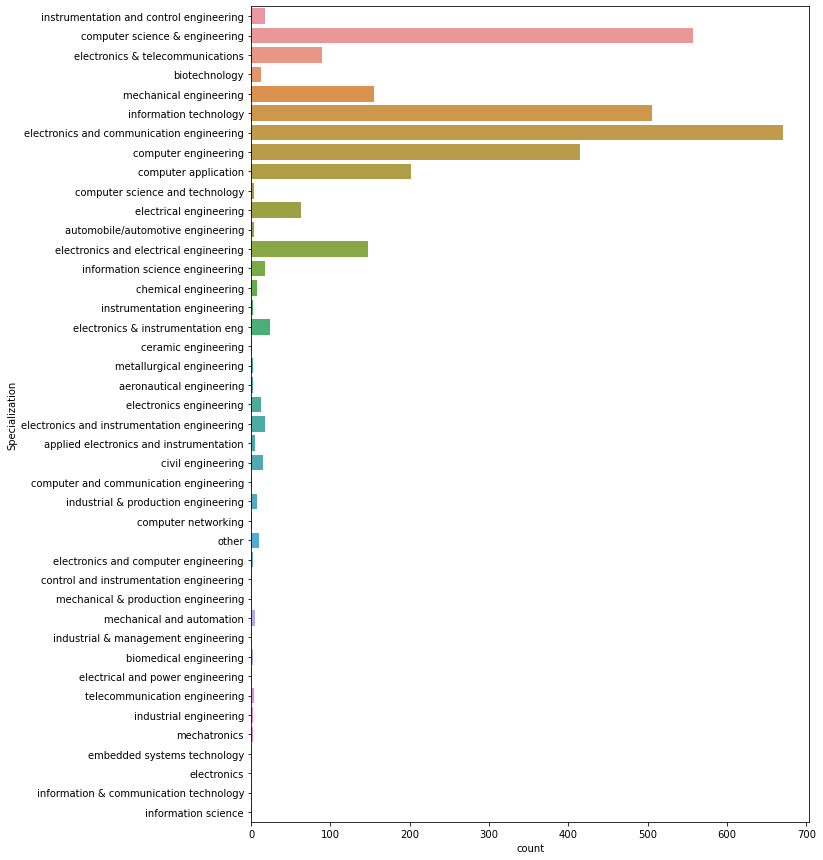

In [13]:
plt.figure(figsize = (10,15))
sns.countplot(y = 'Specialization',data = df)

<AxesSubplot:xlabel='Salary', ylabel='Specialization'>

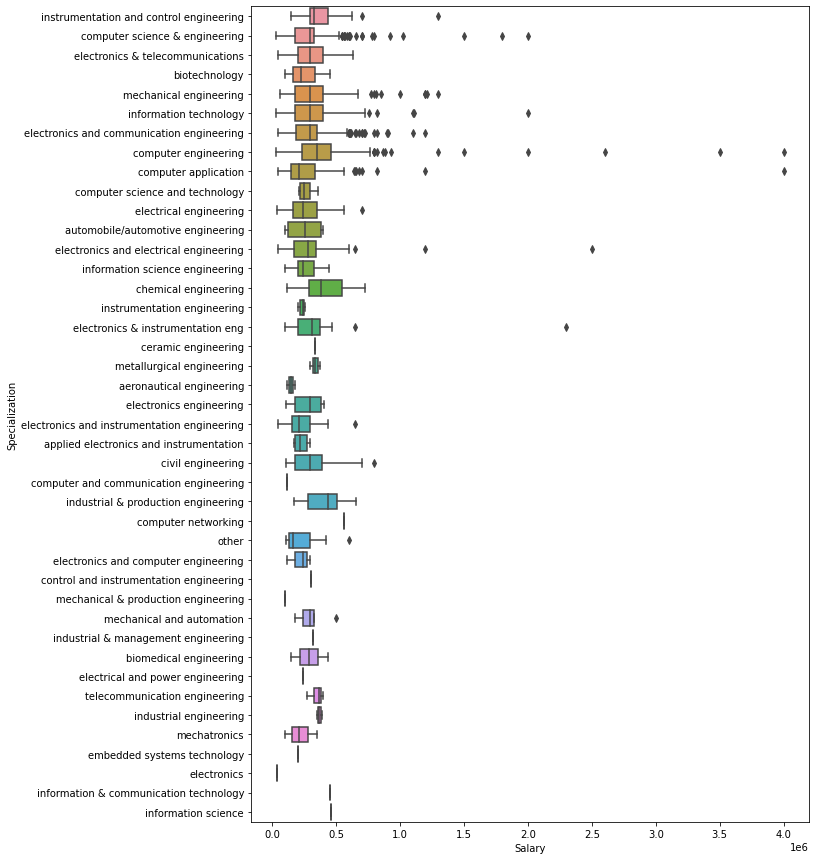

In [14]:
plt.figure(figsize = (10,15))
sns.boxplot(y = 'Specialization',x = 'Salary',data = df)

## Feature Selection based on Filtering Correlation

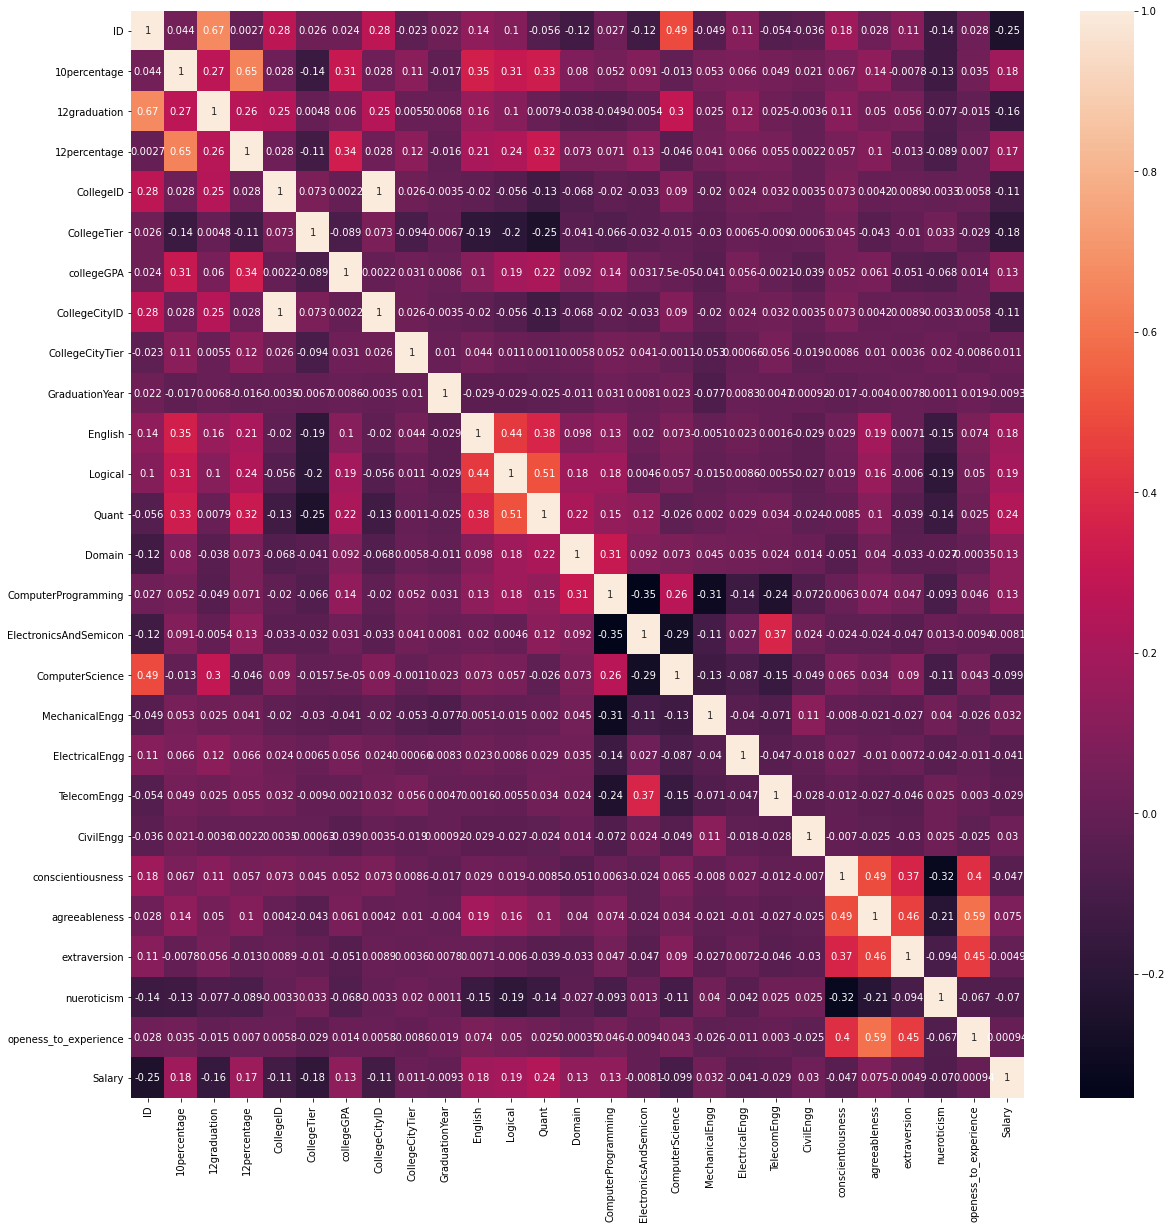

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [16]:
#Correlation with output variable
cor_target = abs(cor["Salary"])

#Selecting highly correlated features
print("cor_target \n", cor_target)
print("\n")
relevant_features = cor_target[cor_target>0.1]
print("relevant_features \n", relevant_features)

cor_target 
 ID                       0.250228
10percentage             0.181414
12graduation             0.161793
12percentage             0.172755
CollegeID                0.114908
CollegeTier              0.177975
collegeGPA               0.131912
CollegeCityID            0.114908
CollegeCityTier          0.011149
GraduationYear           0.009333
English                  0.179668
Logical                  0.193647
Quant                    0.239345
Domain                   0.132845
ComputerProgramming      0.134235
ElectronicsAndSemicon    0.008085
ComputerScience          0.099373
MechanicalEngg           0.032333
ElectricalEngg           0.041403
TelecomEngg              0.029485
CivilEngg                0.030387
conscientiousness        0.047134
agreeableness            0.074756
extraversion             0.004930
nueroticism              0.069983
openess_to_experience    0.000940
Salary                   1.000000
Name: Salary, dtype: float64


relevant_features 
 ID                

In [22]:
# dropping features which do not make any sense to predict salary
df_new = df[['10percentage', '12graduation','collegeGPA','English',
             'Logical','Quant','Domain','ComputerProgramming','CollegeCityTier',"CollegeTier",'Salary']]
df_new.head()

,10percentage,12graduation,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,CollegeCityTier,CollegeTier,Salary
0,87.80,2009,73.82,650,665,810,0.694479,485,1,1,445000
1,57.00,2010,65.00,440,435,210,0.342315,365,0,2,110000
2,77.33,2007,61.94,485,475,505,0.824666,-1,0,2,255000
3,84.30,2009,80.40,675,620,635,0.990009,655,1,1,420000
4,82.00,2008,64.30,575,495,365,0.278457,315,1,2,200000


## Separate target and predictor variables

In [28]:
X = df_new.drop(['Salary'], axis = 1)
y = df_new['Salary']

## Train test split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Standardise the data

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit(X_test)

## Modelling
### 1. Support Vector Regression

In [62]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

y = sc_y.fit_transform(y)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)

X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[445000. 110000. 255000. ... 385000. 530000. 200000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 2. Multiple Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

# instantiate an object for the model
reg = LinearRegression()

# fit a multiple linear regression model
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ 2.51417176e+03 -2.81385760e+04  1.21631004e+03  1.55008812e+02
  1.38476653e+02  1.76825589e+02  2.23516100e+04  4.52931690e+01
 -1.24628159e+04 -7.74444082e+04]
Variance score: 0.11517610963016445


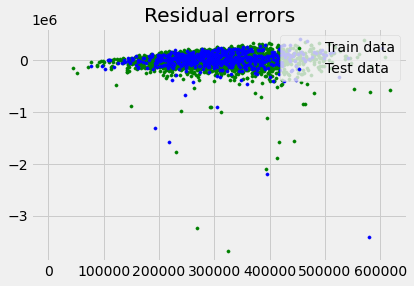

In [42]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [53]:
y_pred1 = reg.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error

mae_linReg = mean_absolute_error(y_test, y_pred1)
print("Mean Absolute Error = ", mae_linReg)

Mean Absolute Error =  111584.73737403263


### 3. XGBoost Regressor

In [59]:
#!pip install xgboost
from xgboost import XGBRegressor
# loading the model
model1 = XGBRegressor()
# training the model with X_train
model1.fit(X_train, y_train)

#test data predictions
y_pred2 = model1.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error = ", mae_xgb)

Mean Absolute Error =  124364.82046875
